# **Pengaruh Peningkatan Jumlah Transportasi dengan Kualitas Udara di DKI Jakarta Tahun 2020-2023**

## **Authors**

No | Name | ID | GitHub username | In charge activity
:-: | :- | :-: | :- | :-
1 | Darell Timothy Tarigan | 10222014 | [DarellTim](https://github.com/DarellTim) | YouTube presenation video
2 | Izzah Huwaidah | 10222040 | [IzzahHuwaidah](https://github.com/IzzahHuwaidah) | Notebook finalization
3 | Azwa Aliyah Zaki | 10222080 | [Alivican](https://github.com/Alivican) | Discussion on GitHub issues
4 | Ashma Nisa Sholihah Adma  | 10222091 | [ashmanisaa](https://github.com/ashmanisaa) | Slide on OSF

## **Abstrak**
Peningkatan jumlah kendaraan bermotor di DKI Jakarta telah memengaruhi kualitas udara secara signifikan, terutama dalam rentang waktu 2020-2023. Penelitian ini bertujuan untuk menganalisis hubungan antara pertumbuhan kendaraan dengan kadar polutan udara, memprediksi kadar gas polutan pada tahun 2025, serta mengidentifikasi wilayah dengan tingkat polusi tertinggi. Analisis data menunjukkan bahwa peningkatan jumlah kendaraan, terutama sepeda motor, berkorelasi positif dengan konsentrasi polutan seperti PM10 dan NO₂. Tren data juga mengindikasikan bahwa tanpa kebijakan mitigasi yang efektif, kadar polutan diprediksi tetap tinggi di masa depan. Wilayah Kebon Jeruk ditemukan sebagai area dengan tingkat polusi tertinggi, sedangkan Jagakarsa memiliki kualitas udara terbaik karena keberadaan ruang terbuka hijau yang melimpah. Temuan ini diharapkan dapat menjadi acuan dalam merumuskan kebijakan mitigasi polusi udara yang lebih efektif di DKI Jakarta.

Kata kunci: DKI Jakarta, kendaraan bermotor, mitigasi polusi, polusi udara, prediksi polutan.

## **Latar Belakang**
Pencemaran udara menjadi salah satu masalah lingkungan yang hingga saat ini belum menemukan solusi yang efektif. Beberapa penyebab utama pencemaran udara adalah limbah industri, sampah, kepadatan penduduk, dan kendaraan bermotor yang berkontribusi signifikan terhadap polusi. Kendaraan bermotor, khususnya, menjadi penyumbang terbesar emisi gas polutan seperti SO2 (sulfur dioksida) dan NO2 (nitrogen dioksida) yang memengaruhi kualitas udara.

DKI Jakarta, sebagai ibu kota negara Indonesia, merupakan pusat berbagai aktivitas dengan tingkat kepadatan penduduk yang tinggi. Berdasarkan data Badan Pusat Statistik (BPS, 2023), jumlah penduduk DKI Jakarta mencapai 10.609.700 jiwa. Kondisi ini diperburuk oleh tingginya intensitas kegiatan transportasi dan urbanisasi, menjadikan pencemaran udara di wilayah ini sebagai salah satu tantangan terbesar bagi pemerintah.

Menurut data *Indeks Kualitas Lingkungan Hidup* (IKLH) yang diterbitkan oleh Kementerian Lingkungan Hidup dan Kehutanan (KLHK), nilai *Indeks Kualitas Udara* (IKU) wilayah Metropolitan Jakarta selama tahun 2011 hingga 2023 sering berada pada kategori "waspada" atau "sangat buruk". Penilaian IKU berdasarkan parameter konsentrasi SO2 dan NO2 menunjukkan bahwa kadar gas polutan di DKI Jakarta masih berada di bawah standar yang ditetapkan, mencerminkan kualitas udara yang buruk.

Berdasarkan permasalahan tersebut maka RBL ini bertujuan untuk menganalisis pengaruh peningkatan jumlah kendaraan terhadap kualitas udara di DKI Jakarta selama periode 2020-2023, sebagai langkah awal dalam memahami hubungan antara pertumbuhan transportasi dan polusi udara. Selain itu, RBL ini juga bertujuan untuk membuat model prediktif yang dapat memperkirakan kadar gas polutan pada tahun 2025 dan mengidentifikasi wilayah di DKI Jakarta dengan tingkat polusi udara tertinggi.



## **Metode**

Untuk menetukan hubungan dari pencemaran udara dengan jumlah transportasi di jakarta, diperlukan data pencemaran udara dan data jumlah transportasi. Data-data tersebut kemudian diolah menggunakan python pandas dan berbagai library python lainnya yang tercantum dibawah ini. Sebelum digunakan data sudah dibersihkan terlebih dahulu sehingga tidak ada data yang kosong. 

In [99]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import griddata
from shapely.geometry import Point

##### **Membuat data excel rata-rata parameter ISPU 2020-2023**
Data parameter ISPU dari tahun 2020 hingga 2023 dikumpulkan dari sumber resmi satu data DKI Jakarta. Parameter ISPU seperti PM10, CO, SO2, NO2, dan O3 diolah menjadi rata-rata tiap tahun. Data ini disimpan dalam format Excel untuk kemudahan analisis dan visualisasi.

In [100]:
# Buat data rata-rata parameter ISPU tiap tahun

# Ganti dengan path file 
file_2020 = 'Data/ISPU 2020.xlsx'
file_2021 = 'Data/ISPU 2021.xlsx'
file_2022 = 'Data/ISPU 2022.xlsx'
file_2023 = 'Data/ISPU 2023.xlsx'
file_trans = 'Data/Jumlah kendaraan Bermotor 2020-2023.xlsx'
file_mean_ispu = 'Data/Rata-rata_ISPU_per_Tahun.xlsx'

# Baca file Excel
df_2020 = pd.read_excel(file_2020)
df_2021 = pd.read_excel(file_2021)
df_2022 = pd.read_excel(file_2022)
df_2023 = pd.read_excel(file_2023)
df_trans = pd.read_excel(file_trans)
df_mean = pd.read_excel(file_mean_ispu)

df_2020['tahun'] = 2020
df_2021['tahun'] = 2021
df_2022['tahun'] = 2022
df_2023['tahun'] = 2023

# Gabungkan semua data menjadi satu DataFrame
df = pd.concat([df_2020, df_2021, df_2022, df_2023])

# Pastikan semua kolom numerik memiliki tipe data float, dan ubah jika tidak sesuai
numeric_columns = ['pm_10', 'so2', 'co', 'o3', 'no2']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Mengubah ke numerik, non-numerik jadi NaN


# Menghitung rata-rata tiap parameter per tahun (mengabaikan NaN)
rata_rata_tahunan = df.groupby('tahun')[numeric_columns].mean()

# Menampilkan hasil rata-rata
print("Rata-rata Parameter ISPU per Tahun:")
print(rata_rata_tahunan)


Rata-rata Parameter ISPU per Tahun:
           pm_10        so2         co         o3        no2
tahun                                                       
2020   60.412568  36.016997  20.830137  68.581967  15.377049
2021   52.896257  35.697308  11.934997  31.338167  20.411031
2022   59.835165  47.903846  18.409341  57.337912  28.766484
2023   54.934579  41.864486  11.069315  27.193146  18.581776


##### **Menghitung statistik deskriptif untuk kolom polutan**
Menghitung statistik deskriptif untuk tiap parameter (kadar gas polutan) yaitu mean, standar deviasi, nilai minimum dan maksimum, kuartil di 25%,50% dan 75%. Tabel ini membantu memberikan gambaran distribusi data dan identifikasi anomali. Perhitungan dapat dilakukan menggunakan Python (pandas).

In [101]:
# Menghitung statistik deskriptif (mean,standar deviasi, nilai minimum dan maksimum, kuartil di 25%,50% dan 75%) untuk kolom polutan

# Pilih kolom yang ingin dianalisis
columns = ['pm_10', 'so2', 'co', 'o3', 'no2']

# Hitung statistik deskriptif
descriptive_stats = pd.DataFrame({
    'mean': df[columns].mean(),
    'standar deviasi': df[columns].std(),
    'nilai minimum': df[columns].min(),
    '25%': df[columns].quantile(0.25),
    '50%': df[columns].quantile(0.50),
    '75%': df[columns].quantile(0.75),
    'nilai maksimum': df[columns].max()
})

# Format angka dengan dua desimal
descriptive_stats = descriptive_stats.round(2)

# Tampilkan tabel statistik deskriptif
print("\nStatistik Deskriptif ISPU 2020-2023:")
print(descriptive_stats)
# Simpan tabel statistik ke file Excel
#descriptive_stats.to_excel('statistik_ispu_2020_2023.xlsx', sheet_name='Statistik Deskriptif')

print("\nTabel berhasil disimpan sebagai 'statistik_ispu_2020_2023.xlsx'.")


Statistik Deskriptif ISPU 2020-2023:
        mean  standar deviasi  nilai minimum   25%   50%   75%  nilai maksimum
pm_10  55.13            15.18            3.0  46.0  56.0  65.0           179.0
so2    39.24            12.82            2.0  28.0  41.0  51.0            89.0
co     13.21             7.19            1.0   9.0  12.0  16.0            75.0
o3     36.37            22.83            4.0  22.0  30.0  43.0           213.0
no2    20.09             9.69            0.0  13.0  19.0  26.0            65.0

Tabel berhasil disimpan sebagai 'statistik_ispu_2020_2023.xlsx'.


##### **Membuat matriks korelasi antar kadar polutan dengan heat map**
Menggunakan matriks korelasi untuk menganalisis hubungan antar parameter polutan. Korelasi dihitung dengan Python (pandas dan numpy) dan divisualisasikan dalam bentuk heatmap menggunakan seaborn untuk memahami hubungan linier antar parameter.

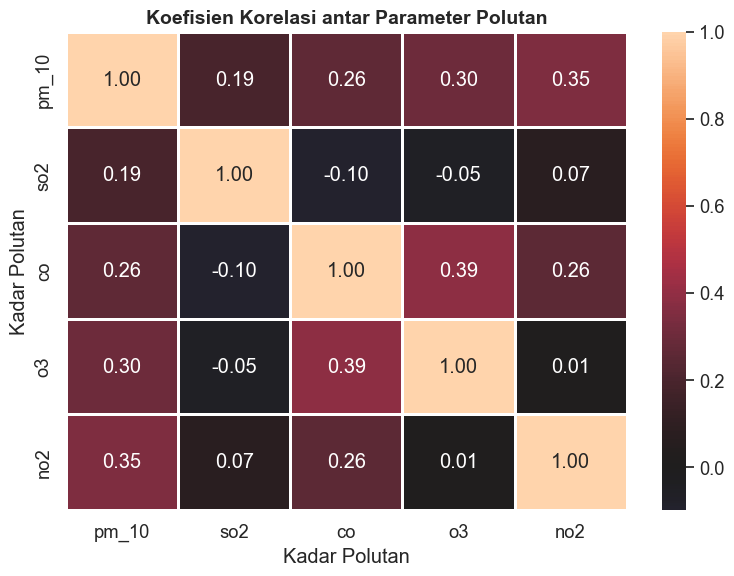

In [102]:
# Menghitung matriks korelasi
correlation_matrix = df[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))  # Atur ukuran figure
sns.set(font_scale=1.2)  # Atur ukuran font
heatmap = sns.heatmap(correlation_matrix, annot=True, center=0, linewidths=1, fmt=".2f")

# Judul heatmap
plt.title('Koefisien Korelasi antar Parameter Polutan', fontsize=14, fontweight='bold')

# Tampilkan plot
plt.xlabel('Kadar Polutan')
plt.ylabel('Kadar Polutan')
plt.tight_layout()
plt.show()

##### **Menghitung statistik deskriptif untuk kolom jumlah kendaraan**

Data jumlah kendaraan dikumpulkan dari sumber resmi Badan Pusat Statistik Provinsi DKI Jakarta. Setelah itu dilakukan perhitungan statistik deskriptif untuk tiap jenis kendaraan yaitu mean, standar deviasi, nilai minimum dan maksimum, kuartil di 25%, 50% dan 75%. Tabel ini membantu memberikan gambaran distribusi data dan identifikasi anomali. Perhitungan dapat dilakukan menggunakan Python (pandas).

In [103]:
# Data jumlah kendaraan per tahun
tahun = ["2020", "2021", "2022", "2023"]
mobil_penumpang = [3365467, 3544491, 3766059, 3836692]
bus = [35266, 36339, 37180, 38615]
truk = [679708, 713059, 748395, 802603]
sepeda_motor = [16141380, 16711638, 17304447, 18229176]

# Buat DataFrame
data_kendaraan = pd.DataFrame({
    'Tahun': tahun,
    'Mobil Penumpang': mobil_penumpang,
    'Bus': bus,
    'Truk': truk,
    'Sepeda Motor': sepeda_motor
})

# Hitung statistik deskriptif
descriptive_stats = pd.DataFrame({
    'Mean': data_kendaraan.drop(columns='Tahun').mean(),
    'Standar Deviasi': data_kendaraan.drop(columns='Tahun').std(),
    'Nilai Minimum': data_kendaraan.drop(columns='Tahun').min(),
    '25%': data_kendaraan.drop(columns='Tahun').quantile(0.25),
    '50%': data_kendaraan.drop(columns='Tahun').quantile(0.50),
    '75%': data_kendaraan.drop(columns='Tahun').quantile(0.75),
    'Nilai Maksimum': data_kendaraan.drop(columns='Tahun').max()
})

# Format angka dengan dua desimal
descriptive_stats = descriptive_stats.round(2)

# Simpan tabel statistik ke file Excel
#descriptive_stats.to_excel('statistik_kendaraan_2020_2023.xlsx', sheet_name='Statistik Kendaraan')

# Cetak statistik deskriptif ke layar
print("Statistik Deskriptif Jumlah Kendaraan Tahun 2020-2023:")
print(descriptive_stats)

Statistik Deskriptif Jumlah Kendaraan Tahun 2020-2023:
                        Mean  Standar Deviasi  Nilai Minimum          25%  \
Mobil Penumpang   3628177.25        214871.93        3365467   3499735.00   
Bus                 36850.00          1413.54          35266     36070.75   
Truk               735941.25         52550.49         679708    704721.25   
Sepeda Motor     17096660.25        891921.10       16141380  16569073.50   

                        50%          75%  Nilai Maksimum  
Mobil Penumpang   3655275.0   3783717.25         3836692  
Bus                 36759.5     37538.75           38615  
Truk               730727.0    761947.00          802603  
Sepeda Motor     17008042.5  17535629.25        18229176  


##### **Membuat grafik histogram jumlah kendaraan 2020-2023**
Dari data jumlah kendaraan tahun 2020-2023 dapat dibuat histogram untuk memvisualisasikan distribusi jumlah kendaraan per tahun dari 2020 hingga 2023. Python dengan library matplotlib atau seaborn dapat digunakan untuk membuat histogram tersebut.

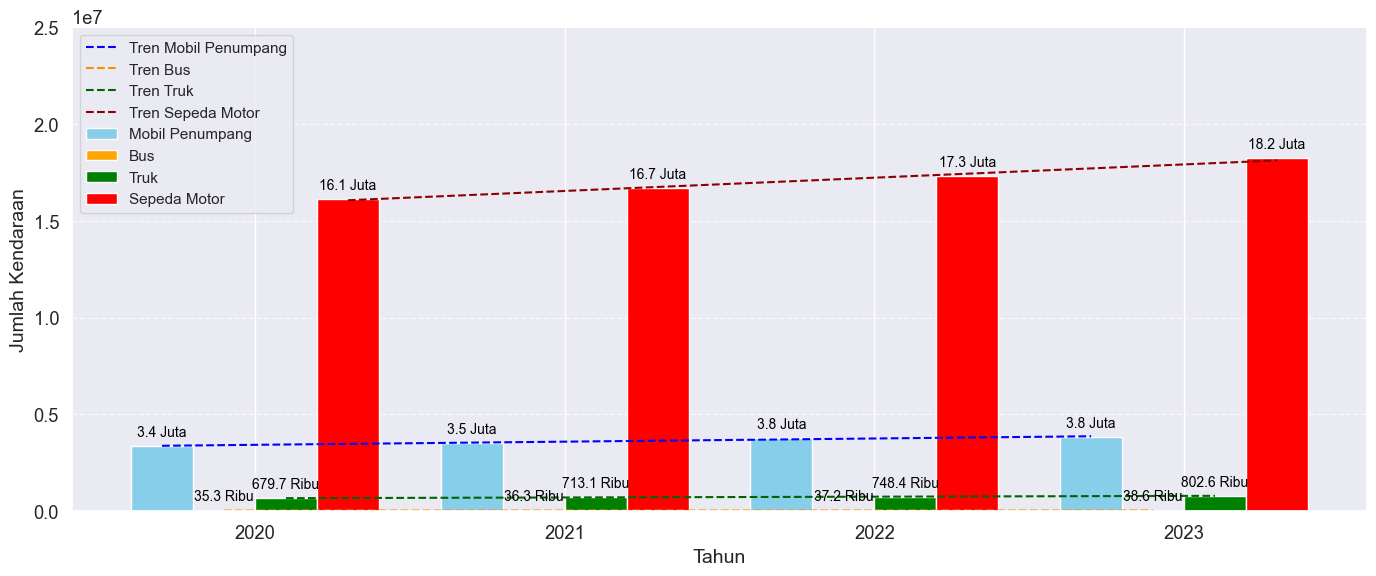

In [104]:
# Data
tahun = ["2020", "2021", "2022", "2023"]
mobil_penumpang = [3365467, 3544491, 3766059, 3836692]
bus = [35266, 36339, 37180, 38615]
truk = [679708, 713059, 748395, 802603]
sepeda_motor = [16141380, 16711638, 17304447, 18229176]

x = np.arange(len(tahun))  # posisi untuk sumbu x
width = 0.2  # lebar batang

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - 1.5 * width, mobil_penumpang, width, label='Mobil Penumpang', color='skyblue')
bars2 = ax.bar(x - 0.5 * width, bus, width, label='Bus', color='orange')
bars3 = ax.bar(x + 0.5 * width, truk, width, label='Truk', color='green')
bars4 = ax.bar(x + 1.5 * width, sepeda_motor, width, label='Sepeda Motor', color='red')

# Fungsi untuk menambahkan label di atas batang
def add_value_labels(bars, scale=1_000_000, unit='Juta'):
    for bar in bars:
        height = bar.get_height()
        label = f'{height/scale:.1f} {unit}'
        ax.annotate(label,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

# Tambahkan label dengan satuan Juta
add_value_labels(bars1, scale=1_000_000, unit='Juta')
add_value_labels(bars2, scale=1_000, unit='Ribu')
add_value_labels(bars3, scale=1_000, unit='Ribu')
add_value_labels(bars4, scale=1_000_000, unit='Juta')

# Fungsi untuk menambahkan garis tren
def add_trendline(ax, x, y, label, color, offset=0):
    # Pusatkan data x sesuai posisi batang
    x_centered = x + offset
    coeffs = np.polyfit(x_centered, y, 1)  # Regresi linear
    trendline = np.polyval(coeffs, x_centered)

    # Tambahkan garis tren
    ax.plot(x_centered, trendline, label=f'Tren {label}', linestyle='--', color=color)

# Tambahkan garis tren untuk setiap kategori
add_trendline(ax, x, mobil_penumpang, 'Mobil Penumpang', 'blue', offset=-1.5 * width)
add_trendline(ax, x, bus, 'Bus', 'darkorange', offset=-0.5 * width)
add_trendline(ax, x, truk, 'Truk', 'darkgreen', offset=0.5 * width)
add_trendline(ax, x, sepeda_motor, 'Sepeda Motor', 'darkred', offset=1.5 * width)

# Sumbu dan tata letak
ax.set_ylabel('Jumlah Kendaraan', fontsize=14)
ax.set_xlabel('Tahun', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(tahun)
ax.legend(loc='upper left',fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Tambahkan grid horizontal ringan
ax.set_ylim(0, 2.5e7)

# Menampilkan Grafik
plt.tight_layout()
plt.show()


##### **Membuat grafik histogram rata-rata parameter ISPU Tahun 2020-2023**
Dari data rata-rata ISPU tahun 2020-2023 maka dapat dibuat histogram untuk memvisualisasikan perubahan rata-rata kadar gas polutan tiap tahun dengan menggunakan matplotlib dan seaborn. Grafik ini membantu melihat tren dan perbedaan kadar polutan antar tahun.

<Figure size 1000x600 with 0 Axes>

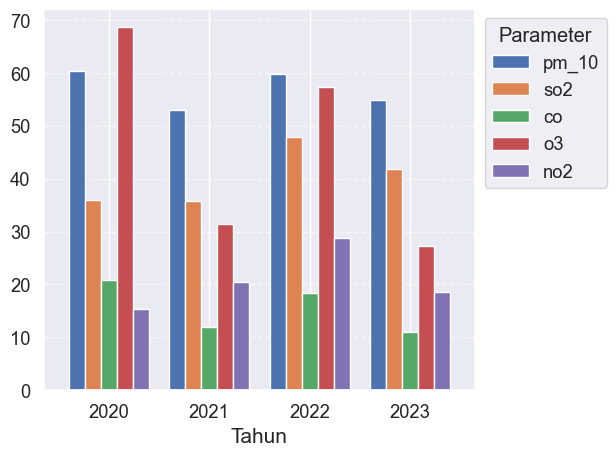

In [105]:
#Membuat Grafik Bar
plt.figure(figsize=(10, 6))

# Plot untuk setiap parameter
rata_rata_tahunan.plot(kind='bar', width=0.8)

# Menambahkan judul dan label
#plt.title('Rata-rata Parameter ISPU per Tahun 2020-2023')
plt.xlabel('Tahun', fontsize=15)

plt.xticks(rotation=0)  # Agar sumbu X tidak miring
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan legenda di luar grafik agar tidak menutupi
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Parameter')

# Menampilkan grafik
plt.tight_layout()
plt.show()

##### **Membuat pie chart proporsi kategori ISPU tahun 2020-2023**
Dari data Indeks Standar Pencemar Udara (ISPU) diambil kolom yang mencakup kategori (baik, sedang, tidak sehat, sangat tidak sehat, berbahaya). Kemudian, proporsi masing-masing kategori setiap tahun dihitung dan dibuat plot dengan pie chart untuk menggambarkan proporsi ini.

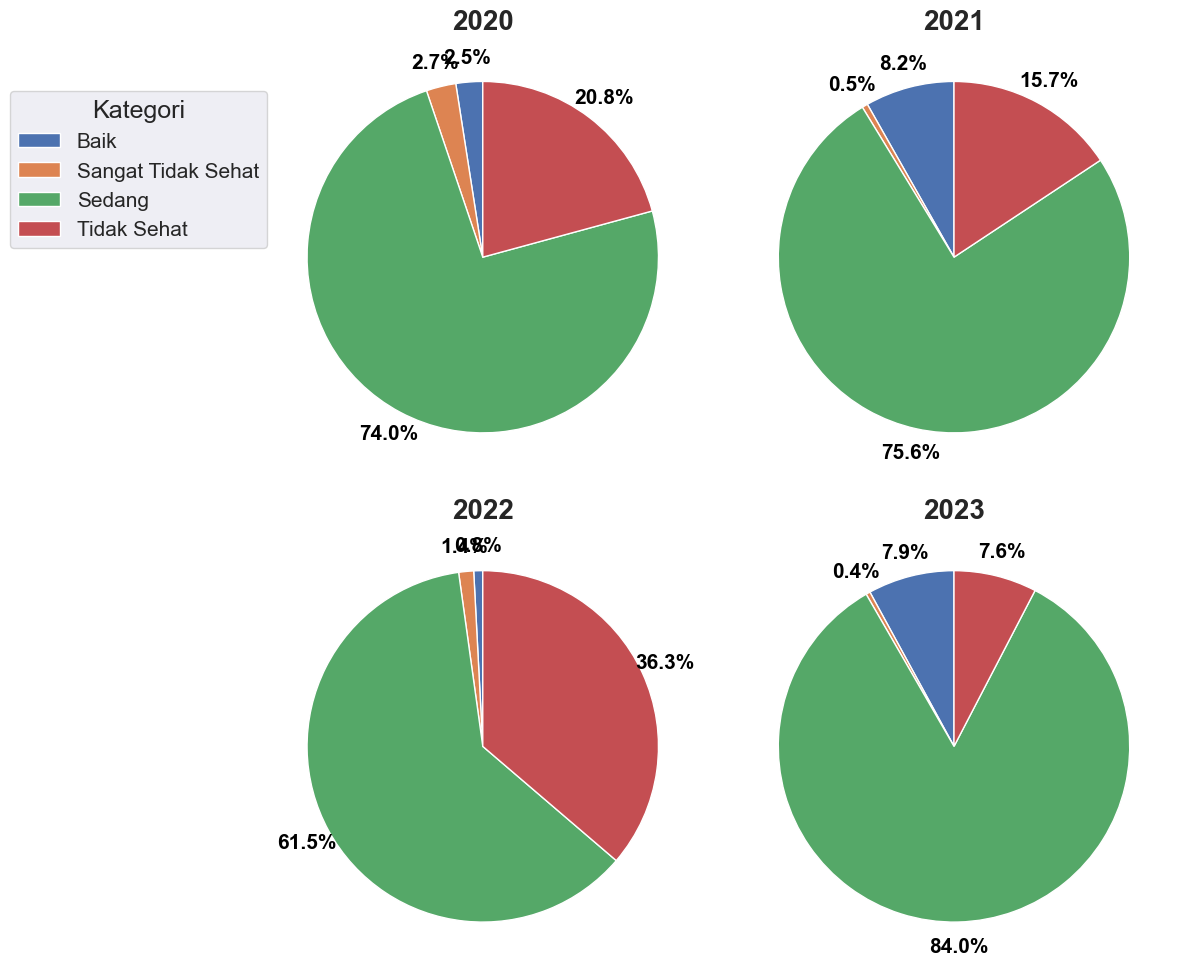

In [106]:
# Fungsi untuk menentukan kategori ISPU
def kategori_ispu(nilai_ispu):
    if nilai_ispu <= 50:
        return 'Baik'
    elif nilai_ispu <= 100:
        return 'Sedang'
    elif nilai_ispu <= 150:
        return 'Tidak Sehat'
    else:
        return 'Sangat Tidak Sehat'

# Buat kolom kategori ISPU
df['kategori'] = df['max'].apply(kategori_ispu)

# Hitung proporsi kategori per tahun
proporsi_kategori = df.groupby(['tahun', 'kategori']).size().unstack(fill_value=0)
proporsi_kategori = proporsi_kategori.div(proporsi_kategori.sum(axis=1), axis=0) * 100

# Menentukan jumlah subplot dalam grid 2x2
tahun_list = proporsi_kategori.index
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Dua baris, dua kolom

# Membuat pie chart untuk setiap tahun
for ax, (tahun, data) in zip(axes.flat, proporsi_kategori.iterrows()):
    wedges, texts, autotexts = ax.pie(
        data,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.95,  # Jarak persentase dari pusat lingkaran
    )
    

    # Memindahkan persentase ke luar lingkaran dan memberi bold
    for autotext in autotexts:
        x, y = autotext.get_position()  # Mendapatkan posisi awal
        autotext.set_position((x * 1.2, y * 1.2))  # Memindahkan ke luar
        autotext.set_fontweight('bold')  # Membuat tebal
        autotext.set_fontsize(15)  # Menyesuaikan ukuran font
        autotext.set_color('black')  # Menentukan warna

    # Menambahkan judul untuk setiap subplot
    ax.set_title(f'{tahun}', fontsize=20, fontweight='bold')

    # Menambahkan legenda untuk subplot pertama
    if tahun == tahun_list[0]:
        ax.legend(
            wedges, data.index, title='Kategori', loc="center left",
            bbox_to_anchor=(-0.6, 0.7), fontsize=15, title_fontsize=18
        )

# Menambahkan judul utama
#fig.suptitle('Proporsi Kategori ISPU Per Tahun', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


##### **Membuat matriks korelasi antara jenis kendaraan dan kadar gas polusi dengan heat map**
Data kadar gas polutan dengan jumlah kendaraan untuk setiap tahun digabungkan, kemudian matriks korelasi antara keduanya dihitung. Analisis ini dapat membantu mengidentifikasi hubungan antara peningkatan kendaraan dengan kualitas udara. 

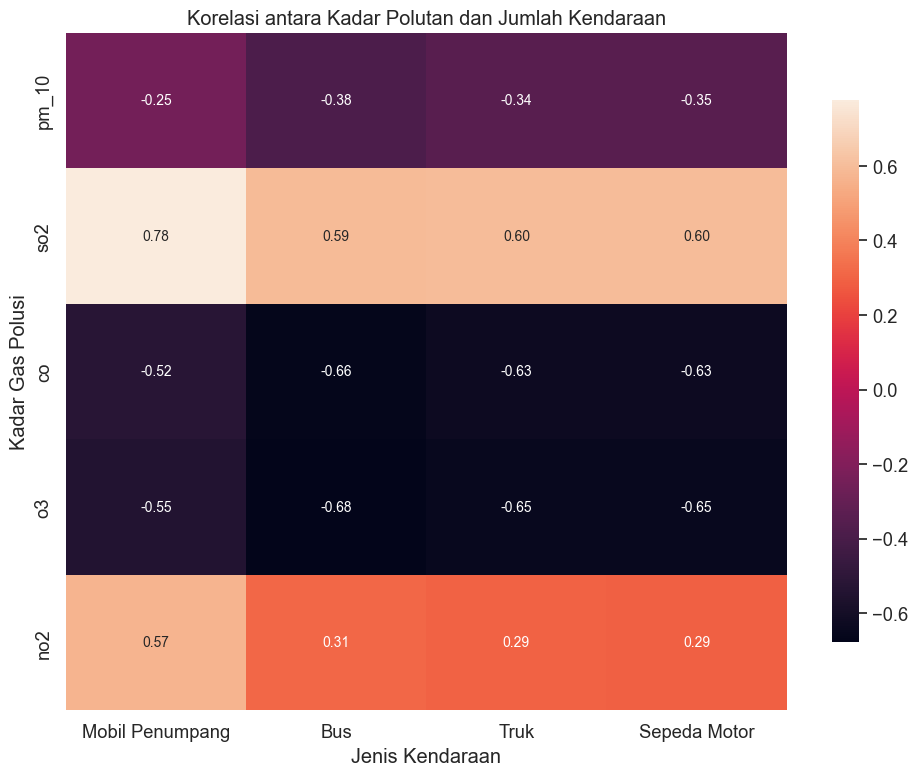

In [107]:
# Gabungkan data berdasarkan kolom 'tahun'
merged_df = pd.merge(df_trans, df_mean, on='tahun')

# Korelasi antara jumlah kendaraan dan kadar gas polusi
correlation_matrix = merged_df[['Mobil Penumpang', 'Bus', 'Truk', 'Sepeda Motor', 'pm_10', 'so2', 'co', 'o3', 'no2']].corr()

# Pilih hanya kolom kendaraan (sumbu X) dan kadar gas polusi (sumbu Y)
correlation_matrix_kendaraan_gas = correlation_matrix.loc[
    ['pm_10', 'so2', 'co', 'o3', 'no2'],
    ['Mobil Penumpang', 'Bus', 'Truk', 'Sepeda Motor']
]

# Membuat heatmap
plt.figure(figsize=(10, 8))  # Menyesuaikan ukuran gambar untuk lebih jelas
sns.heatmap(correlation_matrix_kendaraan_gas, annot=True, fmt='.2f', annot_kws={'size': 10}, cbar_kws={'shrink': 0.8})

# Memberikan judul
plt.title('Korelasi antara Kadar Polutan dan Jumlah Kendaraan')

# Memberikan label pada sumbu X dan Y
plt.xlabel('Jenis Kendaraan')
plt.ylabel('Kadar Gas Polusi')

# Tampilkan plot
plt.tight_layout()  # Agar plot lebih rapi dan tidak terpotong
plt.show()


##### **Membuat file excel rata-rata parameter tiap bulan untuk tahun 2020-2023**
Data parameter ISPU dari tahun 2020 hingga 2023 dikumpulkan dari sumber resmi satu data DKI Jakarta. Parameter ISPU seperti PM10, CO, SO2, NO2, dan O3 diolah menjadi rata-rata bulanan untuk tiap tahun. Data ini disimpan dalam format Excel untuk kemudahan analisis regresi linear.

In [108]:
# Gabungkan semua data menjadi satu DataFrame
df = pd.concat([df_2020, df_2021, df_2022, df_2023])

# Pastikan semua kolom numerik memiliki tipe data float, dan ubah jika tidak sesuai
numeric_columns = ['pm_10', 'so2', 'co', 'o3', 'no2']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Mengubah ke numerik, non-numerik jadi NaN

# Tambahkan kolom bulan jika belum ada (asumsikan ada kolom tanggal)
df['bulan'] = pd.to_datetime(df['tanggal']).dt.month  # Pastikan ada kolom 'tanggal' dengan format tanggal

# Menghitung rata-rata tiap parameter per bulan untuk setiap tahun
rata_rata_bulanan = df.groupby(['tahun', 'bulan'])[numeric_columns].mean()

# Reset index untuk tampilan yang lebih rapi
rata_rata_bulanan = rata_rata_bulanan.reset_index()

# Menampilkan hasil rata-rata bulanan
print("Rata-rata Parameter ISPU per Bulan untuk Tiap Tahun:")
print(rata_rata_bulanan)


Rata-rata Parameter ISPU per Bulan untuk Tiap Tahun:
    tahun  bulan      pm_10        so2         co         o3        no2
0    2020      1  56.419355  34.967742  32.064516  70.516129  11.967742
1    2020      2  56.172414  25.724138  35.620690  90.655172  14.137931
2    2020      3  44.129032  18.277778  31.133333  98.806452   7.064516
3    2020      4  64.633333  26.533333  22.033333  93.300000   9.900000
4    2020      5  58.290323  25.000000  18.709677  80.645161  10.290323
5    2020      6  67.533333  23.866667  20.166667  79.633333  13.066667
6    2020      7  68.064516  25.387097  17.677419  91.741935  13.387097
7    2020      8  74.451613  27.935484  18.193548  82.548387  13.709677
8    2020      9  71.200000  51.100000  14.100000  41.500000  23.333333
9    2020     10  64.677419  53.258065  15.096774  38.032258  25.322581
10   2020     11  61.733333  56.966667  16.300000  32.800000  27.900000
11   2020     12  38.129032  55.548387   9.806452  23.354839  14.774194
12   2021  

##### **Membuat prediksi tren tiap kadar gas polutan dengan cara regresi linear**
Melakukan analisis tren dengan regresi linier untuk masing-masing parameter polutan dari 2020 hingga 2023. Model regresi digunakan untuk memprediksi kadar gas polutan di tahun 2025, dihitung untuk tiap bulan. Python (scikit-learn) digunakan untuk membuat model dan prediksi.

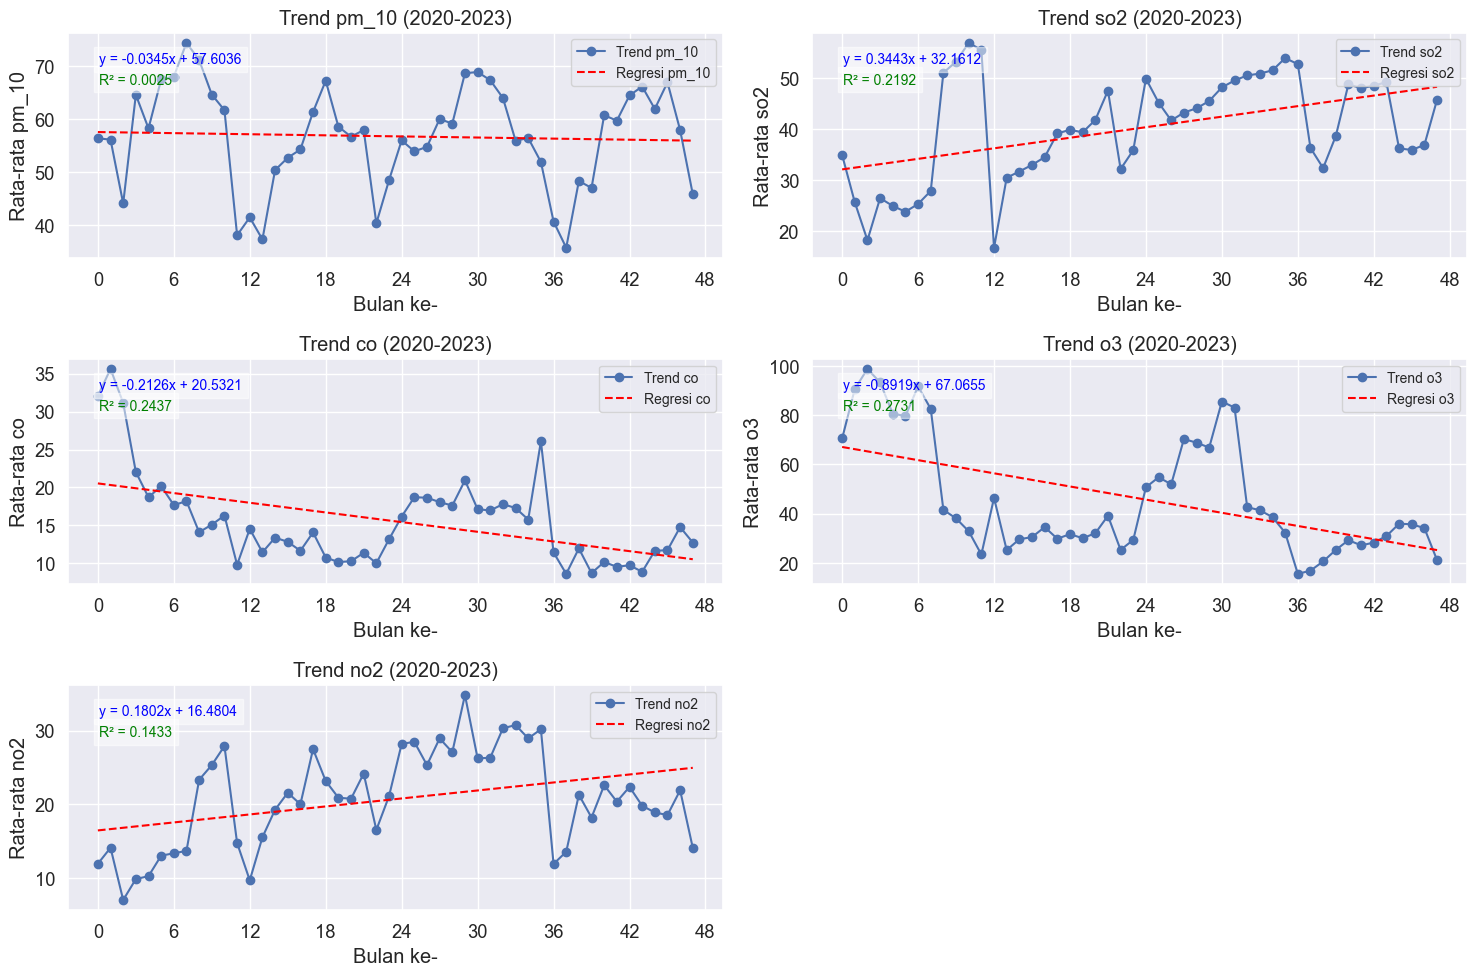

In [109]:
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

# Membuat figur tunggal
plt.figure(figsize=(15, 10))

for i, param in enumerate(['pm_10', 'so2', 'co', 'o3', 'no2']):
    X = rata_rata_bulanan.index.values.reshape(-1, 1)  # Tahun sebagai variabel independen
    y = rata_rata_bulanan[param].values  # Nilai parameter ISPU sebagai variabel dependen

    if y.size == 0:
        print(f"Tidak ada data untuk parameter {param}")
        continue

    # Membuat model regresi
    model = LinearRegression()
    model.fit(X, y)

    # Membuat prediksi tren
    trend_line = model.predict(X)

    # Mendapatkan koefisien regresi, intercept, dan nilai R^2
    coef = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X, y)

    # Menggunakan format 4 angka di belakang koma
    equation = f"y = {coef:.4f}x + {intercept:.4f}"
    r_squared_text = f"R² = {r_squared:.4f}"

    # Membuat subplot
    ax = plt.subplot(3, 2, i + 1)  # Membuat layout subplot 3 baris, 2 kolom
    ax.plot(X, y, marker='o', label=f'Trend {param}')
    ax.plot(X, trend_line, color='red', linestyle='--', label=f'Regresi {param}')
    ax.set_title(f'Trend {param} (2020-2023)')
    ax.set_xlabel('Bulan ke-')
    ax.set_ylabel(f'Rata-rata {param}')

    # Tambahkan persamaan regresi dan R^2 ke grafik
    ax.text(
        X.min() + 0.1,
        max(y) - 0.1 * (max(y) - min(y)),
        equation,
        fontsize=10,
        color='blue',
        bbox=dict(facecolor='white', alpha=0.5)
    )
    ax.text(
        X.min() + 0.1,
        max(y) - 0.2 * (max(y) - min(y)),
        r_squared_text,
        fontsize=10,
        color='green',
        bbox=dict(facecolor='white', alpha=0.5)
    )

    # Mengatur sumbu X agar tidak ada angka desimal
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    ax.legend(fontsize=10, loc='upper right')
    ax.grid(True)

# Menyusun tata letak agar tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan semua grafik dalam satu gambar
plt.show()


##### **Membuat distribusi kadar gas polutan dengan tipe kontur di Jakarta tahun 2023**
Distribusi kadar gas polutan di tiap daerah DKI Jakarta yaitu DKI1 Bunderan HI, DKI2 Kelapa Gading, DKI3 Jagakarsa, DKI4 Lubang Buaya, DKI5 Kebon Jeruk divisualisasikan menggunakan peta kontur. Data geografis koordinat tiap daerah diambil dari google maps untuk memetakan distribusi kadar gas polutan di setiap wilayah DKI Jakarta. Kadar polutan direpresentasikan dengan gradasi warna untuk memudahkan interpretasi visual.

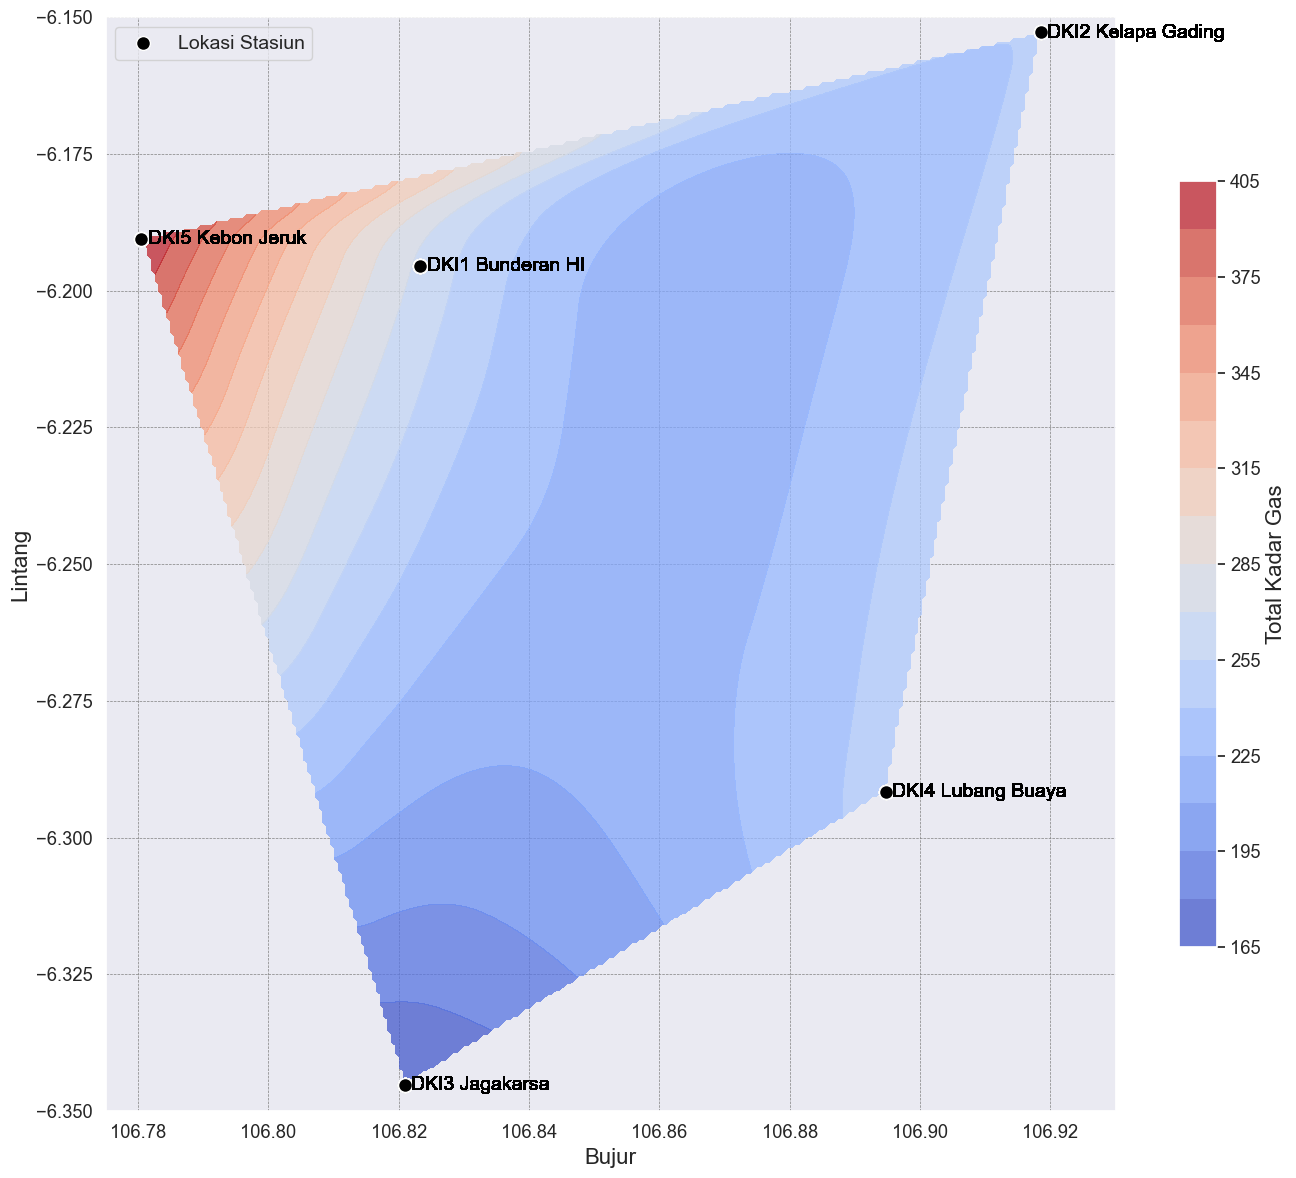

In [110]:
# Atur ukuran font secara global
plt.rcParams.update({'font.size': 14})

# Baca data dari file Excel
file_path = 'Data/ISPU 2023.xlsx'  # Ganti dengan path file Excel Anda
df = pd.read_excel(file_path)

# 1. Tambahkan koordinat berdasarkan nama stasiun dari google maps
coordinates = {
    "DKI1 Bunderan HI": {"longitude": 106.8233, "latitude": -6.1955},
    "DKI2 Kelapa Gading": {"longitude": 106.9185, "latitude": -6.1528},
    "DKI3 Jagakarsa": {"longitude": 106.8209, "latitude": -6.3452},
    "DKI4 Lubang Buaya": {"longitude": 106.8947, "latitude": -6.2916},
    "DKI5 Kebon Jeruk": {"longitude": 106.7805, "latitude": -6.1905},
}

df["longitude"] = df["stasiun"].map(lambda x: coordinates.get(x, {}).get("longitude"))
df["latitude"] = df["stasiun"].map(lambda x: coordinates.get(x, {}).get("latitude"))

# Hapus baris dengan nilai koordinat kosong
df = df.dropna(subset=["longitude", "latitude"])

# 2. Tambahkan kolom total kadar gas
df["total_gas"] = df["pm_10"] + df["pm_2.5"] + df["so2"] + df["co"] * 10 + df["o3"] + df["no2"]

# 3. Interpolasi untuk peta kontur
# Siapkan grid bujur-lintang dengan resolusi halus
grid_x, grid_y = np.mgrid[106.775:106.95:300j, -6.35:-6.15:300j]

# Interpolasi nilai gas menggunakan griddata
grid_z = griddata(
    (df["longitude"], df["latitude"]),
    df["total_gas"],
    (grid_x, grid_y),
    method="cubic",
)

# 4. Plot peta distribusi kadar gas
fig, ax = plt.subplots(figsize=(14, 12))  # Perbesar ukuran figure

# Plot kontur dengan level yang jelas
contour = ax.contourf(grid_x, grid_y, grid_z, levels=15, cmap="coolwarm", alpha=0.75)
cbar = plt.colorbar(contour, ax=ax, shrink=0.7)
cbar.set_label("Total Kadar Gas", fontsize=16)  # Perbesar font label colorbar

# Plot titik lokasi stasiun sebagai marker
ax.scatter(df["longitude"], df["latitude"], c="black", s=100, edgecolor="white", label="Lokasi Stasiun")

# Tambahkan label nama stasiun dengan sedikit offset agar tidak tumpang tindih
for idx, row in df.iterrows():
    ax.text(row["longitude"] + 0.001, row["latitude"] - 0.001, row["stasiun"], fontsize=14, color="black")

# Atur tampilan sumbu dan grid
ax.set_xlim(106.775, 106.93)
ax.set_ylim(-6.35, -6.15)
ax.set_xlabel("Bujur", fontsize=16)  # Perbesar font label sumbu
ax.set_ylabel("Lintang", fontsize=16)  # Perbesar font label sumbu
#ax.set_title("Distribusi Kadar Gas dengan Kontur di Jakarta (2023)", fontsize=18, pad=20)  # Perbesar font judul

# Tambahkan grid
ax.grid(color="gray", linestyle="--", linewidth=0.5)

# Tambahkan legenda
plt.legend(loc="upper left", fontsize=14)  # Perbesar font legenda

# Tampilkan peta
plt.tight_layout()
plt.show()


## **Hasil dan Pembahasan**

#### **Parameter Statistik Kadar Gas Polutan**

| Jenis Polutan | Mean | Standar Deviasi | Nilai Minimum | 25% | 50% | 75% | Nilai Maksimum |
|---|---|---|---|---|---|---|---|
| pm10 (µg/m³) | 55.13 | 15.18 | 3.0 | 46.0 | 56.0 | 65.0 | 179.0 |
| SO2 (µg/m³) | 39.24 | 12.82 | 2.0 | 28.0 | 41.0 | 51.0 | 89.0 |
| CO (µg/m³) | 13.21 | 7.19 | 1.0 | 9.0 | 12.0 | 16.0 | 75.0 |
| O3 (µg/m³) | 36.37 | 22.83 | 4.0 | 22.0 | 30.0 | 43.0 | 213.0 |
| NO2 (µg/m³) | 20.09 | 9.69 | 0.0 | 13.0 | 19.0 | 26.0 | 65.0 |

Berdasarkan pengolahan data diatas diperoleh parameter-parameter statistikm dari data ISPU DKI Jakarta tahun 2020-2023 yang diperoleh sebelumnya. Parameter-parameter statistik tersebut diantaranya yaitu rata-rata kadar polutan yang menunjukkan tingkat konsentrasi polutan di lingkungan Jakarta selama periode pengamatan. Berdasarkan data yang diperoleh, kadar polutan PM_10 memiliki rata-rata kadar tertinggi sebesar 55.13 $\mu g/m^3$, lalu diikuti oleh polutan $SO_2$ dengan rata-rata sebesar 39.24 $\mu g/m^3$. Hal ini menunjukkan bahwa polutan yang paling dominan di lingkungan Jakarta adalah PM_10. Ini dapat terjadi karena polutan PM_10 disebabkan oleh berbagai sumber, seperti kendaraan bermotor, industri, pembakaran dan lainnya yang menyebabkan kadar PM_10 di Jakarta lebih dominan terutama banyaknya penduduk dan industri di dalamnya.

Selain rata-rata, terdapat parameter standar deviasi yang menunjukkan tingkat ketidakpastian data atau fluktuasi dari konsntrasi polutan. Semakin besarnya nilai standar deviasi, maka semakin bervariasi pula konsentrasi suatu polutan di lingkungan Jakarta. Berdasarkan data yang diperoleh, polutan $O_3$ memiliki standar deviasi tertinggi yaitu sebesar 22.83 $\mu g/m^3$. Hal ini menunjukkan bahwa ozon atau $O_3$ mengalami fluktuasi yang cukup besar di lingkungan Jakarta karena diperngaruhi oleh berbagai faktor seperti cuaca, sinar matahari dan reaksi kimia.

Selain standar devisi, terdapat nilai minimum dan maksimum yang menunjukkan konsentrasi polutan yang paling rendah dan paling tertinggi di lingkungan Jakarta. Berdasarkan data yang diperoleh, polutan $NO_2$ dan PM_10 masing-masing memiliki nilai minimum yang paling rendah sebesar 0 $\mu g/m^3$ dan nilai maksimum yang paling tinggi sebesar 213 $\mu g/m^3$. Hal ini menunjukkan bahwa terdapat beberapa titik pengukuran yang tidak mendeteksi polutan $NO_2$ yang menunjukkan adanya waktu tertentu ketika kualitas udara sangat baik, seperti setelah hujan atau di daerah dengan aktivitas manusia rendah. Sementara itu, polutan PM_10 memiliki nilai maksimum yang paling tinggi karena sering kali terjadi saat ada fenomena alami seperti selama musim kemarau yang banyak berterabaran debu-debu, kemacetan lalu lintas yang ekstrem dan fenomena lainnya.



#### **Korelasi Antar Kadar Polutan**

[matriks korelasi antar kadar polutan.png](RBL-PGDA/Gambar%20Grafik/matriks%20korelasi%20antar%20kadar%20polutan.png)

Grafik tersebut menunjukkan hubungan antara kadar polutan satu sama lain dengan dicantumkan nilai korelasi antar keduanya. Nilai korelasi yang positif menunjukkan hubungan keduanya cenderung berbanding lurus. Nilai korelasi yang negatif menunjukkan hubungan keduanya cenderung berbanding terbalik sedangkan apabilan nilai korelasi mendekati 0 menunjukkan hubbungan yang lemah atau tidak ada hubungan antara keduanya. Dari gambar diatas dapat dilihat hubungan dari antar polutannya.


Korelasi antar polutan $pm_10$ dan $NO_2$ adalah 0.35 yang menunjukkan hubungan yang positif tetapi tidak kuat yang menunjukkan bahwa keduanya cenderung berbanding lurus yaitu apabila kadar $pm_10$ meningkat maka kadar $NO_2$ juga meningkat, begitupun sebbaliknya walaupun hubungannya lemah atau sedang. Hal ini dapat terjadi karena keduanya dapat berasal dari sumber yang sama yaitu seperti emisi kendaraan bermotor. Begitu juga dengan korelasi antar polutan $pm_10$ dan $O_3$. 

Korelasi keduanya menunjukkan nilai korelasi sebesar 0.30 yang menunjukkan hubungan positif yang lemah. Hal ini dapat terjadi karena keduanya dapat berasal dari sumber yang sama yaitu seperti emisi kendaraan.Korelasi antar polutan $CO$ dan $O_3$ menunjukkan nilai korelasi sebesar 0.39 yang menunjukkan hubungan positif yang lemah. Hal ini dapat terjadi karena keduanya dapat berasal dari sumber yang sama yaitu salah satunya kendaraan bermotor.


Korelasi antar polutan $SO_2$ dengan polutan lainnya yaitu $NO_2$ dan $PM_10$ menunjukkan nilai korelasi sebesar 0.07 dan 0.19 yang menunjukkan hubungan positif yang lemah. Keduanya saling berbanding lurus tetapi hubungan keduanya lemah.


Korelasi polutan $SO_2$ dengan polutan $O_3$ dan $CO$ menunjukkan nilai korelasi sebesar -0.05 dan -0.10 yang merupakan hubungan negatif yang lemah. Hal ini menunjukkan bahwa keduanya saling berbanding terbalik yaitu apabila kadar $SO_2$ meningkat maka kadar $O_3$ dan $CO$ menurun dan keduanya memiliki hubungan yang lemah.


Korelasi antar polutan $CO$ dengan polutan lainnya selain polutan $SO_2$ saling berbanding lurus dan memiliki hubungan positif yang lemah. Hal ini dapat terjadi karena keduanya dapat berasal dari sumber yang sama yaitu kendaraan bermotor sedangkan untuk polutan $SO_2$ kemungkinan elbih banyak dihasilkan dari proses industri.



#### **Parameter Statistik Jumlah Kendaraan**

| Jenis Kendaraan | Mean | Standar Deviasi | Nilai Minimum | 25% | 50% | 75% | Nilai Maksimum |
|---|---|---|---|---|---|---|---|
| Mobil Penumpang (ribu) | 3628.177 | 214.872 | 3365.467 | 3499.735 | 3655.275 | 3783.717 | 3836.692 |
| Bus (ribu) | 36.85 | 1.414 | 35.266 | 36.071 | 36.76 | 37.539 | 38.615 |
| Truk (ribu) | 735.941 | 52.551 | 679.708 | 704.721 | 730.727 | 761.947 | 802.603 |
| Sepeda Motor (ribu) | 17096.66 | 891.921 | 16141.38 | 16569.074 | 17008.043 | 17535.629 | 18229.176 |

Berdasarkan pengolahan data diatas diperoleh parameter-parameter statistik dari data jumlah kendaraan di DKI Jakarta tahun 2020-2023 yang diperoleh sebelumnya. Parameter-parameter statistik tersebut diantaranya yaitu rata-rata jumlah kendaraan dari berbagai jenis yang menunjukkan tingkat konsentrasi kendaraan dari 5 jenis kendaraan di lingkungan Jakarta selama periode pengamatan. Berdasarkan data yang diperoleh, jenis kendaraan sepeda motor memiliki rata-rata jumlah kendaraan tertinggi sekitar 17 juta, lalu diikuti oleh mobil penumpang dengan rata-rata sekitar 3 juta. Hal ini menunjukkan bahwa jenis kendaraan sepeda motor yang paling dominan di lingkungan Jakarta adalah sepeda motor diikuti oleh mobil penumpang.

Selain rata-rata, terdapat parameter standar deviasi yang menunjukkan tingkat ketersebaran dari setiap jenis kendaraan. Semakin besarnya nilai standar deviasi, maka semakin bervariasi pula jumlan kendaraan suatu jenis kendaraan di lingkungan Jakarta. Berdasarkan data yang diperoleh, sepeda motor memiliki standar deviasi tertinggi yaitu sekitar 891 ribu diikuti oleh mobil penumpang sekitar 214 ribu. Hal ini menunjukkan bahwa tingkat ketersebaran sepeda motor yang cukup besar di lingkungan Jakarta untuk antar tahunnya. Simpangan baku yang besar tersebut menunjukkan bahwa sepeda motor memiliki variasi yang cukup besar dalam jumlahnya di lingkungan Jakarta karena menjadi pilihan utama di daerah perkotaan dan adanya pandemi COVID-19 juga menyebabkan pergeseran dari angkutan umum ke kendaraan pribadi seperti sepeda motor dan mobil penumpang

Selain standar devisi, terdapat nilai minimum dan maksimum yang menunjukkan jumlah dari berbagai jenis kendaraan yang paling rendah dan paling tertinggi di lingkungan Jakarta. Berdasarkan data yang diperoleh, kendaraan bus dan kendaraan sepeda motor masing-masing memiliki nilai minimum yang paling rendah sekitar 35 ribu dan nilai maksimum yang paling tinggi sekitar 18 juta. Hal ini menunjukkan bahwa bus dengan nilai minimum sekitar 35 ribu memiliki jumlah kendaraan yang paling rendah di lingkungan DKI Jakarta terdapat pada tahun 2020 dimana hal tersebut  masih terjadinya pandemi sehingga jumlah kendaraan bus pada tahun tersebut paling sedikit daripada tahun-tahun setelahnya. Sementara itu, sepeda motor dengan nilai maksimum sekitar 18 juta terdapat pada tahun 2023, hal ini dapat dibabkan karena laju pertumbuhan penduduk di DKI Jakarta yang cukup tinggi dan meningkatnya seiring tahun.

#### **Histogram Jumlah Kendaraan Tahun 2020-2023**

![grafik histogram jumlah kendaraan 2020-2023.png](../RBL-PGDA/Gambar%20Grafik/grafik%20histogram%20jumlah%20kendaraan%202020-2023.png)
Grafik tersebut menunjukkan jumlah kendaraan di Indonesia terus meningkat setiap tahunnya. Sepeda motor menjadi kendaraan yang paling banyak digunakan dan terus bertambah jumlahnya. Mobil juga naik, meskipun kenaikannya lebih lambat dibandingkan sepeda motor. Truk mengalami peningkatan yang cukup besar, yang menunjukkan adanya pertumbuhan di sektor pengiriman barang. Sementara itu, jumlah bus tidak banyak berubah, menunjukkan bahwa transportasi umum berbasis bus belum berkembang dengan pesat.  

Tren ini menggambarkan bahwa lebih banyak orang memilih kendaraan pribadi, terutama sepeda motor, yang dapat berpotensi meningkatkan polusi udara dan kemacetan. Untuk mengurangi dampak negatif ini, penting untuk memperbaiki dan mengembangkan transportasi umum seperti bus. Dengan lebih banyak orang beralih ke transportasi umum, bisa mengurangi jumlah kendaraan pribadi di jalan, yang akan membantu mengurangi polusi udara.

#### **Histogram Rata-Rata Kadar Gas Polutan Tahun 2020-2023**

[Rata-rata Parameter ISPU Tahun 2020-2023.png](https://drive.google.com/file/d/1s5LFeLrJnAGKF4kNI8GL8jGXO7Lh_E7O/view?usp=drive_link)

Grafik diatas menunjukkan perubahan kualitas udara di Jakarta dari tahun 2020 hingga 2023 dengan mengukur beberapa jenis polusi, seperti pm_10 (debu atau partikel kecil), so2 (sulfur dioksida), co (karbon monoksida), o3 (ozon), dan no2 (nitrogen dioksida). 
Dari grafik tersebut dapat dilakukan analisis bahwa terlihat pm_10 selalu tinggi setiap tahun, yang menandakan banyaknya debu dan polusi dari kendaraan bermotor. o3 (ozon) paling tinggi di tahun 2020, lalu naik-turun di tahun berikutnya, karena reaksi emisi gas buang kendaraan dengan sinar matahari. Polusi so2 meningkat pada tahun 2022 dan tetap tinggi di 2023, yang umumnya berasal dari kendaraan berbahan bakar solar. Sementara itu, no2 dan co, yang juga berasal dari asap kendaraan mengalami perubahan naik dan turun.

Kualitas udara di Jakarta sangat dipengaruhi oleh jumlah kendaraan yang semakin meningkat. Polusi seperti debu pm_10 dan gas berbahaya seperti so2, co, dan no2 adalah hasil dari gas buang kendaraan bermotor. Penurunan polusi terlihat pada tahun 2021 karena pembatasan aktivitas selama pandemi COVID-19. Namun, setelah mobilitas kembali normal, polusi udara kembali naik di 2022 dan 2023.

#### **Proporsi Kategori ISPU Tahun 2020-2023**

![Pie chart Proporsi Kategori ISPU Tahun 2020-2023.png](https://drive.google.com/file/d/1UEuXP4iKY-Uqf6nJNKbjkQqxER2Oe2sg/view?usp=drive_link)

Berdasarkan gambar diatas, ditunjukkan proporsi kualitas udara di DKI Jakarta selama tahun 2020 hingga 2023 berdasarkan kategori Indeks Standar Pencemar Udara (ISPU). Diagram lingkaran menunjukkan distribusi persentase dari kategori "Baik," "Sedang," "Tidak Sehat," dan "Sangat Tidak Sehat" untuk setiap tahun. Dari data tersebut, diperoleh bahwa kualitas udara di Jakarta mengalami fluktuasi selama rentang periode 2020 hingga 2023, dengan kategori "Sedang" yang lebih dominan di semua tahun.

Pada tahun 2020, kategori "Sedang" mencakup 74% dari total data ISPU, menunjukkan bahwa kualitas udara pada tahun tersebut umumnya berada dalam kondisi cukup baik untuk aktivitas harian. Namun, kategori "Tidak Sehat" juga menempati porsi yang signifikan, yaitu 20.8%, sementara kategori "Baik" hanya sebesar 2.7%, dan kategori "Sangat Tidak Sehat" berada di angka 2.5%. Tahun 2021 menunjukkan sedikit peningkatan, dengan kategori "Sedang" meningkat menjadi 75.6%, dan kategori "Tidak Sehat" menurun menjadi 15.7%. Pada tahun ini, kategori "Baik" dan "Sangat Tidak Sehat" masing-masing hanya sebesar 8.2% dan 0.5%, menandakan perbaikan kecil dalam kualitas udara dibandingkan tahun sebelumnya.

Namun, pada tahun 2022, terjadi penurunan kualitas udara yang signifikan. Proporsi kategori "Sedang" turun menjadi 61.5%, sementara kategori "Tidak Sehat" melonjak tajam hingga 36.3%. Ini menandakan peningkatan polusi udara yang cukup serius pada tahun tersebut, yang mungkin disebabkan oleh peningkatan aktivitas kendaraan atau faktor eksternal lainnya seperti mulai kembalinya aktivitas normal baik kehidupan sehari-hari maupun industri dari pandemi. Kategori "Baik" dan "Sangat Tidak Sehat" pada tahun ini berada pada level yang sangat kecil, masing-masing hanya sebesar 0.8% dan 1.4%.

Pada tahun 2023, terjadi perbaikan kualitas udara yang cukup signifikan, di mana kategori "Sedang" meningkat menjadi 84%, sementara kategori "Tidak Sehat" turun drastis menjadi 7.6%. Kategori "Baik" dan "Sangat Tidak Sehat" masing-masing berada pada angka 7.9% dan 0.4%. Perbaikan ini kemungkinan dipengaruhi oleh kebijakan pengendalian polusi, seperti pembatasan kendaraan bermotor dengan plat bernomor ganjil dan genap, penerapan transportasi ramah lingkungan, atau perbaikan infrastruktur transportasi di Jakarta.

Secara keseluruhan, data ini menunjukkan hubungan erat antara jumlah kendaraan di Jakarta dan kualitas udara. Peningkatan emisi kendaraan bermotor kemungkinan besar berkontribusi terhadap tingginya proporsi kategori "Tidak Sehat," terutama pada tahun 2022. Sebaliknya, upaya mitigasi polusi udara terlihat memberikan dampak positif pada tahun 2023, yang ditandai dengan meningkatnya proporsi kategori "Sedang" dan menurunnya kategori "Tidak Sehat." hal ini juga menunjukkan pentingnya pengendalian emisi kendaraan dan kebijakan lingkungan untuk memperbaiki kualitas udara di DKI Jakarta ataupun untuk daerah luar jakarta juga.

#### **Korelasi Antar Kadar Gas Polutan dengan Jenis Kendaraan**

![matriks korelasi antar kadar polutan.png](<attachment:matriks korelasi antar kadar polutan.png>)

Berdasarkan gambar diatas, diperoleh gas polutan seperti $SO_2$ (Sulfur Dioksida) menunjukkan korelasi positif yang kuat dengan jumlah kendaraan, terutama mobil penumpang dengan nilai korelasi sebesar 0.78 , serta korelasi sedang dengan bus, truk, dan sepeda motor dengan nilai korelasi sebesar 0.60. Hal ini menunjukkan bahwa kendaraan, terutama mobil penumpang, menjadi sumber utama emisi $SO_2$ yang berasal dari pembakaran bahan bakar fosil. Polutan lain seperti $NO_2$ (Nitrogen Dioksida) juga memiliki korelasi positif, dengan mobil penumpang menunjukkan hubungan sedang dengan nilai korelasi sebesar 0.57, sementara dengan bus, truk, dan sepeda motor memiliki korelasi lemah dengan nilai korelasi sebesar 0.29 hingga 0.31. Ini mengindikasikan bahwa emisi $NO_2$ juga dipengaruhi oleh aktivitas kendaraan, tetapi kontribusinya bervariasi tergantung pada jenis kendaraan. Selain itu, hal tersebut juga dapat dipengaruhi dari faktor lainnya seperti dari banyaknya jumlah industri di DKI Jakarta. 

Sebaliknya, gas polutan seperti $CO$ (Karbon Monoksida) dan $O_3$ (Ozon) menunjukkan korelasi negatif yang cukup kuat terhadap semua jenis kendaraan. Untuk $CO$, korelasi berkisar antara -0.52 hingga -0.66, sementara untuk $O_3$ berkisar antara -0.55 hingga -0.68. Korelasi negatif ini menunjukkan bahwa peningkatan jumlah kendaraan dapat menurunkan kadar $CO$ dan $O_3$, kemungkinan besar disebabkan oleh reaksi kimia yang mungkin terjadi di atmosfer, seperti konsumsi $O_3$ oleh emisi $NO_x$. Sementara itu, partikulat materi $PM_10$ memiliki korelasi negatif yang lemah dengan kendaraan, dengan nilai korelasi yang berada dalam rentang antara -0.25 hingga -0.38. Hal ini menunjukkan bahwa kadar PM10 tidak sepenuhnya dipengaruhi oleh jumlah kendaraan, melainkan juga berasal dari sumber lain, seperti aktivitas industri atau pembakaran sampah.

Secara keseluruhan, kendaraan bermotor, terutama mobil penumpang, memiliki dampak signifikan terhadap kadar polutan gas seperti $SO_2$ dan $NO_2$. Di sisi lain, kadar $CO$ dan $O_3$ dipengaruhi oleh reaksi atmosfer akibat emisi kendaraan, sementara $PM_10$ tampaknya lebih bergantung pada sumber eksternal. Analisis ini menegaskan bahwa kendaraan bermotor di DKI Jakarta berkontribusi besar pada kualitas udara, terutama untuk gas-gas yang berkaitan langsung dengan pembakaran bahan bakar fosil.
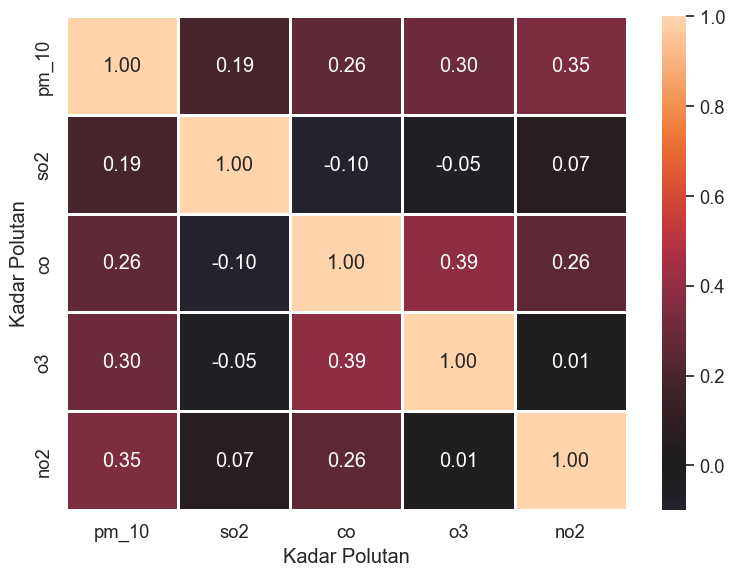

#### **Tren Kadar Gas Polutan Tahun 2020-2023 dan Prediksi Tahun 2025**

![tren dan regresi kadar gas polutan.png](https://drive.google.com/file/d/17x_E4mH5oQ435vV1k0GpxtfI-lG_dNLm/view?usp=drive_link)
Gambar di atas menunjukkan perubahan rata-rata bulanan lima parameter kualitas udara (PM10, SO2, CO, O3, dan NO2) dari tahun 2020 hingga 2023. Dari hasil analisis, terlihat bahwa PM10 terdapat sedikit penurunan, CO dan O3 juga menunjukkan penurunan signifikan menandakan adanya perbaikan kualitas udara. Namun, NO2 dan SO2 menunjukkan peningkatan perlahan, yang disebabkan oleh emisi dari kendaraan bermotor atau aktivitas industri.

Selanjutnya, dari hasil regresi tersebut akan dibuat model sederhana untuk memprediksi perubahan polutan ini di tahun 2025. Dengan cara memasukkan bulan ke 61 sampai 72 ke dalam persamaan regresi tiap kadar gas polutan. Berikut hasilnya yang ditabulasikan dalam tabel.

| Prediksi Bulan | pm_10 | so2 | co | o3 | No2 |
|---|---|---|---|---|---|
| Januari | 55.499 | 34.262 | 7.564 | 12.66 | 5.488 |
| Februari | 55.465 | 34.297 | 7.351 | 11.768 | 5.308 |
| Maret | 55.43 | 34.331 | 7.138 | 10.876 | 5.128 |
| April | 55.396 | 34.366 | 6.926 | 9.984 | 4.948 |
| Mei | 55.361 | 34.4 | 6.713 | 9.092 | 4.767 |
| Juni | 55.327 | 34.434 | 6.501 | 8.2 | 4.587 |
| Juli | 55.292 | 34.469 | 6.288 | 7.308 | 4.407 |
| Agustus | 55.258 | 34.503 | 6.075 | 6.416 | 4.227 |
| September | 55.223 | 34.538 | 5.863 | 5.524 | 4.047 |
| Oktober | 55.189 | 34.572 | 5.65 | 4.633 | 3.866 |
| November | 55.154 | 34.607 | 5.438 | 3.741 | 3.686 |
| Desember | 55.12 | 34.641 | 5.225 | 2.849 | 3.506 |

Model ini akan membantu memproyeksikan rata-rata bulanan tiap polutan, sehingga kita bisa memahami seperti apa kualitas udara di masa depan. Hasil prediksi ini dapat menjadi dasar dalam mengambil langkah-langkah mitigasi untuk menjaga kualitas udara, terutama dalam mengendalikan polutan yang meningkat seperti SO2 dan NO2. Jadi, langkah ini dapat membantu memastikan udara yang lebih bersih dan sehat bagi masyarakat.


#### **Distribusi Kadar Gas dengan Grafik Kontur di Jakarta Tahun 2023**

Gambar di atas menunjukkan sebaran tingkat polusi udara di Jakarta berdasarkan total kadar gas di beberapa lokasi. DKI5 Kebon Jeruk di bagian barat laut memiliki tingkat polusi tertinggi dengan nilai mendekati 405. Hal ini disebabkan oleh *alu lintas yang padat dan banyaknya aktivitas penduduk di daerah tersebut yang menghasilkan banyak asap kendaraan dan polusi dari kegiatan sehari-hari. Sebaliknya, DKI3 Jagakarsa di bagian selatan memiliki tingkat polusi paling rendah sekitar 165. Hal ini bisa terjadi karena kawasan Jagakarsa memiliki banyak ruang terbuka hijau dan lebih sedikit aktivitas kendaraan maupun industri dibandingkan daerah lainnya. Sementara itu, DKI1 Bunderan HI di pusat kota memiliki tingkat polusi sedang meskipun daerah sibuk, berkat adanya upaya pengendalian polusi. Daerah DKI2 Kelapa Gading dan DKI4 Lubang Buaya menunjukkan tingkat polusi menengah.

## **Kesimpulan**
1. Jumlah kendaraan bermotor, terutama sepeda motor, meningkat setiap tahun di DKI Jakarta yang membuat kadar polutan meningkat dan menurunkan kualitas udara di DKI Jakarta. Hal ini berdasarkan dari hasil analisa data yang telah dipaparkan bahwa peningkatan kendaraan memiliki korelasi positif dengan kadar polutan tertentu, seperti PM10 dan NO2, yang didominasi oleh emisi kendaraan. 
2. Berdasarkan tren data, diestimasikan bahwa kadar gas polutan tetap tinggi jika tidak ada kebijakan mitigasi atau pengendalian polusi yang efektif.
3. Kebon Jeruk memiliki polusi tertinggi, sementara Jagakarsa terendah karena banyak ruang terbuka hijau dan wilayah lain seperti Bunderan HI, Kelapa Gading, dan Lubang Buaya menunjukkan tingkat polusi menengah.

## **Referensi**

[1]	Saxena, P., & Sonwani, S. (2019). Criteria Air Pollutants and their Impact on Environmental Health. In Springer eBooks. https://doi.org/10.1007/978-981-13-9992-3  
[2]	KEPUTUSAN KEPALA BADAN PENGENDALIAN DAMPAK LINGKUNGAN nomor : kep- 107/kabapedal/11/1997: tentang pedoman teknis perhitungan dan pelaporan serta informasi indeks standar pencemar udara. (n.d.). Badan pengendalian dampak lingkungan.  
[3]	Indeks Standar Pencemaran Udara (ISPU) Tahun 2023 - Open Data Jakarta. (n.d.). https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2023  
[4]	Darmanto, N.S., & Sofyan, A. 2012. Analisis distribusi Pencemar Udara NO2, SO2, CO dan O2 di Jakarta dengan WRF-CHEM. Jurnal Teknik Lingkungan, 18(1), 54-64.  
[5]	Kementerian Lingkungan Hidup dan Kehutanan. 2020. Indeks Kualitas Lingkungan Hidup 2019. Jakarta: Kementerian Lingkungan Hidup dan Kehutanan.
